<a href="https://colab.research.google.com/github/syedawaisalishah/Django-ecomerce-project/blob/master/outlier_using_zscore_and_std.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
%matplotlib inline

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/FeatureEngineering/2_outliers_z_score/heights.csv')

In [ ]:
df

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [ ]:
df.describe()

,height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


In [ ]:
a=df.height.min()

In [ ]:
b=df.height.max()

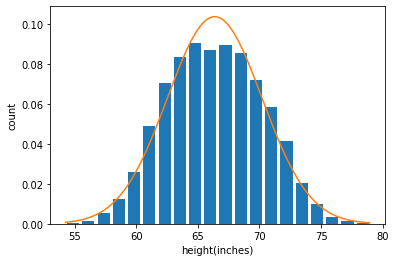

In [ ]:

plt.hist(df.height,bins=20,rwidth=0.8,density=True)
plt.xlabel('height(inches)')
plt.ylabel('count')
rng=np.arange(a,b,0.1)
plt.plot(rng,norm.pdf(rng,df.height.mean(),df.height.std()))

In [ ]:
  uper_limit=df.height.mean()+3*df.height.std()

In [ ]:
uper_limit

77.91014411725232

In [ ]:
lower_limit=df.height.mean()-3*df.height.std()
lower_limit

54.824975392478876

In [ ]:
outlier=df[(df.height<lower_limit)|(df.height>uper_limit)]
outlier

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [ ]:
df2=df[(df.height>lower_limit)&(df.height<uper_limit)]
df2

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [ ]:
df3=df2.to_csv('outlier_remove',index=False)

In [ ]:
df3

# Remove outlier using z score

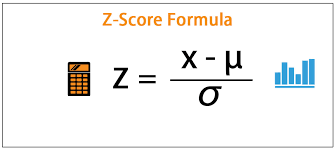

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/FeatureEngineering/2_outliers_z_score/heights.csv')

In [ ]:
df['zscore']=(df.height-df.height.mean())/df.height.std()
df.head()

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [ ]:
df[df.zscore>3]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [ ]:
df[df.zscore<-3]

,gender,height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [ ]:
df[(df.zscore<-3)|(df.zscore>3)]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [ ]:
df[(df.zscore>-3)&(df.zscore<3)]

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090
